# Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv" 

Features: 

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Load your training data set
uploaded = files.upload()
df_training = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
df_training.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,-1,1572,1572,1572,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,0,61094,62483,63882,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,-2,8100,14270,7324,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,0,0,0,4070,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,0,19208,19608,22608,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [ ]:
# Storing unmodified version of the data
import copy
df_training_original = df_training.copy(deep=True)

In [ ]:
# Split training data into X and y
X = df_training.drop('default.payment.next.month', inplace=False, axis=1)
y = df_training_original[['default.payment.next.month']]

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
# Load test data set
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
# Storing unmodified version of the data
df_test_original = df_test.copy(deep=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform Z-score Normalization on continuous variables
scaler = StandardScaler()
for column in df_training.columns:
# For each column in df, fit the scaler and replace the column with the normalized values
  if column not in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month']:
    scaler.fit(df_training[[column]])
    df_training[column] = scaler.transform(df_training[[column]])
      
    # For each column in df_test, standardize using fitted scaler() from training set
    if column in df_test.columns:
      df_test[column] = scaler.transform(df_test[[column]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding on categorical variables

df_training = pd.get_dummies(df_training, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

In [ ]:
df_training.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month',
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6',
       'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2',
       'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_7', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7'],
      dtype='object')

In [ ]:
# check to see if there any columns present in the test set that are not in the training set
set(df_test.columns) - set(df_training.columns)

set()

In [ ]:
# Get missing columns in the test set
missing_cols = set(df_training.columns) - set(df_test.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
df_test = df_test[df_training.columns]
df_test = df_test.drop('default.payment.next.month', inplace=False, axis=1)

In [ ]:
X = df_training.drop('default.payment.next.month', inplace=False, axis=1)

**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(2789, 73)
(2789, 1)
(1196, 73)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
log_reg = LogisticRegression(max_iter = 200)
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset
y_preds = log_reg.predict(X_val)
# print out y_preds variable

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
from sklearn.metrics import confusion_matrix
def my_precision(y, y_preds): #TP/(TP+FP)
  TN, FP, FN, TP = confusion_matrix(y, y_preds).ravel()
  return(TP/(TP+FP))

def my_recall(y, y_preds): #TP/(TP+FN)
  TN, FP, FN, TP = confusion_matrix(y, y_preds).ravel()
  return(TP/(TP+FN))

def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
  TN, FP, FN, TP = confusion_matrix(y, y_preds).ravel()
  return((TP+TN)/(TP+FP+FN+TN))

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
print("Accuracy: ", my_accuracy(y_val, y_preds))
print("Precision: ", my_precision(y_val, y_preds))
print("Recall: ", my_recall(y_val, y_preds))

Accuracy:  0.8202341137123745
Precision:  0.6571428571428571
Recall:  0.42592592592592593


Q. Accuracy<br>

0.8202341137123745

Q. Precision<br>

0.6571428571428571 

Q. Recall<br>

0.42592592592592593

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>

The metric you want to use depends on the type of problem you're solving and the question you want answered. If your goal is simply to quantify the success rate for your model, accuracy may be the metric you want to use. However, if you're dealing with an imbalanced classification problem or if you're dealing with very high costs in case you make the wrong classification, it's more helpful to use either recall or precision in that case. Recall is good if you'd like to focus on all the relevant true predictions in your data set. Precision is appropriate if you're looking to understand what proportion of the data points in our positives were actually relevant positives.

In general, accuracy is not always a useful assessment to use when thinking about critical problems like identifying diseases, terrorists, etc. Precision may be a better metric in these cases where you can make better assessments about your classification models.

Q. Which metric is suitable in this case? <br>
The precision metric is more suitable instead of recall because the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters. 

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

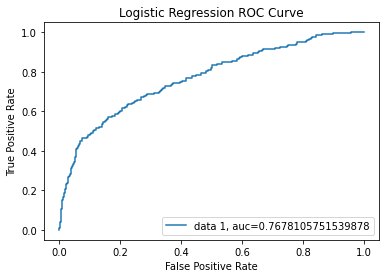

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

y_pred_proba = log_reg.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Q. What is the AUC obtained?<br>
The AUC score obtained is 0.7678105751539878. 

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model. 


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 

In [ ]:
#from sklearn.model_selection import KFold

log_reg = LogisticRegression(max_iter = 200, C=0.1, penalty='l1', solver='liblinear')

log_reg.fit(X_train, y_train.values.ravel())
y_pred = log_reg.predict(X_val)

acc = my_accuracy(y_val, y_pred)
prec = my_precision(y_val, y_pred)
rec = my_recall(y_val, y_pred)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)

Accuracy: 0.8210702341137124
Precision: 0.6772151898734177
Recall: 0.3962962962962963


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 

In [ ]:
#from sklearn.model_selection import KFold

log_reg_2 = LogisticRegression(max_iter = 200, C=0.5, penalty='l1', solver='liblinear')

log_reg_2.fit(X_train, y_train.values.ravel())
y_pred = log_reg_2.predict(X_val)

acc = my_accuracy(y_val, y_pred)
prec = my_precision(y_val, y_pred)
rec = my_recall(y_val, y_pred)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)

Accuracy: 0.8202341137123745
Precision: 0.6608187134502924
Recall: 0.4185185185185185


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
#from sklearn.model_selection import KFold

log_reg_3 = LogisticRegression(max_iter = 200, C=0.1, penalty='l2', solver='liblinear')

log_reg_3.fit(X_train, y_train.values.ravel())
y_pred = log_reg_3.predict(X_val)

acc = my_accuracy(y_val, y_pred)
prec = my_precision(y_val, y_pred)
rec = my_recall(y_val, y_pred)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)

Accuracy: 0.8193979933110368
Precision: 0.6626506024096386
Recall: 0.4074074074074074


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [ ]:
#from sklearn.model_selection import KFold

log_reg_4 = LogisticRegression(max_iter = 200, C=0.5, penalty='l2', solver='liblinear')

log_reg_4.fit(X_train, y_train.values.ravel())
y_pred = log_reg_4.predict(X_val)

acc = my_accuracy(y_val, y_pred)
prec = my_precision(y_val, y_pred)
rec = my_recall(y_val, y_pred)

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)

Accuracy: 0.8202341137123745
Precision: 0.6589595375722543
Recall: 0.4222222222222222


Q. Which of the above models is better?<br> 
Ans- Model 1 (hyperparameter 'C' set to 0.1 and penalty set to 'l1') has the highest precision. Model 4 has the highest average recall, but we prioritize precision over recall given the we don't want to loose potential borrowers.

# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set. 

In [ ]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###

log_reg = LogisticRegression(max_iter = 200, C=0.1, penalty='l1', solver='liblinear')
log_reg.fit(X, y.values.ravel())

# return the prediction as "y_pred"

y_pred = log_reg.predict(df_test)

# Dataset 2
The dataset you will be using in the following parts is the "Pima Indians Diabetes Dataset".

There are two data files: "Diabetes_training.csv" and "Diabetes_Xtest.csv"
Both files have the following fields, except quality which is not available in "Diabetes_Xtest.csv".

Features:

1 - pregnant:	Number of times pregnant <br>
2 - glucose:	Plasma glucose concentration (glucose tolerance test) <br>
3 - pressure:	Diastolic blood pressure (mm Hg) <br>
4 - triceps:	Triceps skin fold thickness (mm) <br>
5 - insulin	2-Hour serum insulin (mu U/ml) <br>
6 - mass:	Body mass index (weight in kg/(height in m)\^2) <br>
7 - pedigree:	Diabetes pedigree function <br>
8 - age:	Age (years)<br>

Target:

diabetes: ('neg','pos')

Training dataset, "Diabetes_training.csv", contains 576 rows and 9 columns. This is the training set containing both of the features and the target.
Test dataset, "Diabetes_Xtest.csv", contains 192 rows and 8 columns. This is the test set which only contains the features.
Prediction task is to determine the test for diabetes. (If you transfrom the target as binary values, please make sure "pos" is 1, "neg" is 0)



In [ ]:
# Load your training data set and test data

uploaded = files.upload()
df_training = pd.read_csv(io.BytesIO(uploaded['Diabetes_training.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['Diabetes_Xtest.csv']))

Saving Diabetes_training.csv to Diabetes_training.csv
Saving Diabetes_Xtest.csv to Diabetes_Xtest.csv


In [ ]:
df_training.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,13,129,0,30,0,39.9,0.569,44,pos
1,9,184,85,15,0,30.0,1.213,49,pos
2,3,193,70,31,0,34.9,0.241,25,pos
3,4,146,78,0,0,38.5,0.520,67,pos
4,3,174,58,22,194,32.9,0.593,36,pos


In [ ]:
# Split training data into X and y

X = df_training.drop('diabetes', inplace=False, axis=1)
y = df_training.loc[:, ['diabetes']]

# re-adjusting 'pos' and 'neg' values for 'diabetes' target variable to 1 and 0
for i in range(y.shape[0]):
  if y.iloc[i, 0] == 'pos':
    y.iloc[i, 0] = 1
  else:
    y.iloc[i, 0] = 0

In [ ]:
X.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,13,129,0,30,0,39.9,0.569,44
1,9,184,85,15,0,30.0,1.213,49
2,3,193,70,31,0,34.9,0.241,25
3,4,146,78,0,0,38.5,0.520,67
4,3,174,58,22,194,32.9,0.593,36


In [ ]:
y.head()

,diabetes
0,1
1,1
2,1
3,1
4,1


Standardize the features on training and test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for column in X.columns:
  scaler.fit(X[[column]])
  X[column] = scaler.transform(X[[column]])
      
  if column in df_test.columns:
    df_test[column] = scaler.transform(df_test[[column]])

Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
y=y.astype('int')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=30) 

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Fit the classifier on the training data
# Please set random_state=30

clf = DecisionTreeClassifier(random_state=30)
clf = clf.fit(X_train, y_train)

In [ ]:
### Make predictions on the training data
y_pred_dt = clf.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data. 

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.
print("Accuracy:", my_accuracy(y_train, y_pred_dt))
print("Precision:", my_precision(y_train, y_pred_dt))
print("Recall:", my_recall(y_train, y_pred_dt))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
### Make predictions on the validation data
y_pred_val = clf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
print("Accuracy:", my_accuracy(y_val, y_pred_val))
print("Precision:", my_precision(y_val, y_pred_val))
print("Recall:", my_recall(y_val, y_pred_val))

Accuracy: 0.653179190751445
Precision: 0.45714285714285713
Recall: 0.5925925925925926


Plot ROC curve and obtain AUC for predictions on the validation data.

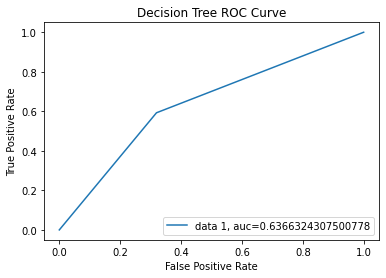

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - The scores for the training set are not meaningful since the decision tree model is able to achieve 100% accuracy, precision, and recall on the training set. This is always possible on the training set, when we do not limit the depth and no instances of the same independent variables result in difference values for the dependent variable. However, the 100% scores might indicate that overfitting did occur to some degree. In terms of the bias-variance tradeoff, overfitting is an indicator of low bias but high variance. Next, we look at the scores on the validation set. In general, for a binary dependent variable, chance-level performance is 50%. For the model above scores of 65% accuracy, 46% precision, and 59% recall suggest that the model is not very predictive. The large difference in performance between the training and validation set might be another indicator of overfitting. In order to improve the model, it might be wise to add more bias while significantly decreasing the variance in order to decrease the effects of overfitting.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
clf=RandomForestClassifier(random_state=30)
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(random_state=30)

In [ ]:
### Make predictions on the training data
y_pred_rf=clf.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
print("Accuracy:", my_accuracy(y_train, y_pred_rf))
print("Precision:", my_precision(y_train, y_pred_rf))
print("Recall:", my_recall(y_train, y_pred_rf))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
### Make predictions on the validation data

y_pred_val=clf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
print("Accuracy:", my_accuracy(y_val, y_pred_val))
print("Precision:", my_precision(y_val, y_pred_val))
print("Recall:", my_recall(y_val, y_pred_val))

Accuracy: 0.7456647398843931
Precision: 0.6
Recall: 0.5555555555555556


Plot ROC curve and obtain AUC for the validation predictions

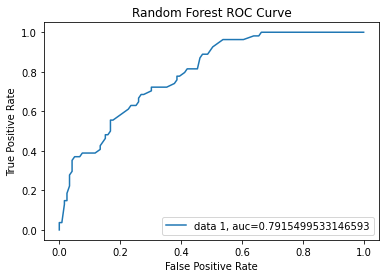

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. 

Ans- The Random Forest model has higher accuracy, precision, recall and AUC vs. the Decision Tree model suggesting that it is a better predictor than the Decision Tree model. The Random Forest approach creates multiple decision trees based on bootstrap examples and for each tree limits the predictors that the tree can be split on to a random subset. This is an improvement over the simple Decision Tree model in two ways: 1) Creating more decorrelated trees (i.e. bagging) is demonstrated to reduce variance because we force the model to try constructing trees in several different ways that one tree might not consider. Basically, we are able to do more with the data that we have. 2) Randomly limiting the predictors reduces the likelihood of getting stuck in a corner in the decision tree. Since the decision-tree model is based on a greedy algorithm it does not look ahead to see what series of splits results in the optimal model which makes it susceptible to choosing an early split that may result in a inferior final result.

Random Forest is a bagging technique used to reduce variance of our predictions by computing the result of multiple classifiers modeled on different sub-samples of the same data set. Therefore, random forest classifier has reduced a problem of over-fitting(high variance) as compared to Decision Tree Model and this can be seen in improved test set results.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [10, 50, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [5, 10],
    'n_estimators': [10, 100, 200]
}

In [ ]:
rf = RandomForestClassifier(random_state=30)

In [ ]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
### Fit on the training data with all sets of parameters.
grid_search.fit(X_train, y_train.values.ravel())


Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 100, 200]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [ ]:
# Print the best parameters
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 10}

In [ ]:
# Print the best score
grid_search.best_score_

0.6870748299319728

In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.

y_pred_hp=clf.predict(X_train)

print("Training Set:")
print("Accuracy:", my_accuracy(y_train, y_pred_hp))
print("Precision:", my_precision(y_train, y_pred_hp))
print("Recall:", my_recall(y_train, y_pred_hp))

print('')

### Make predictions on the validation set and display accuracy, precision and recall.

y_pred_val=clf.predict(X_val)

print("Validation set:")
print("Accuracy:", my_accuracy(y_val, y_pred_val))
print("Precision:", my_precision(y_val, y_pred_val))
print("Recall:", my_recall(y_val, y_pred_val))


Training Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Validation set:
Accuracy: 0.7456647398843931
Precision: 0.6
Recall: 0.5555555555555556


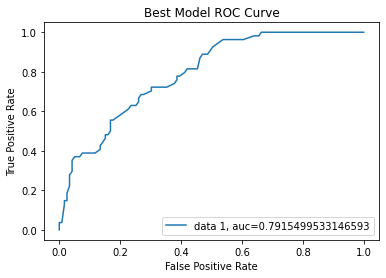

In [ ]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("Best Model ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


#### Test
Choose the best hyperparameter values from the previous section. Use this random forest model to make predictions on test set.

In [ ]:
# Construct your final random forest using the best hyperparameters obtained above

clf = RandomForestClassifier(max_depth = 10, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 10)
clf.fit(X, y.values.ravel())

# return the prediction as "y_pred2"
y_pred2 = clf.predict(df_test)

In [ ]:
#end